In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("./archive/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

In [14]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [17]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [18]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [20]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
from sklearn.preprocessing import LabelEncoder
ecdr=LabelEncoder()
df['target']=ecdr.fit_transform(df['target'])

In [23]:
df.head()                      # 1 --> spam          and 0 --> ham

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.duplicated().sum()

403

In [25]:
df.drop_duplicates(keep='first',inplace=True)

In [26]:
df.shape

(5169, 2)

<Axes: ylabel='count'>

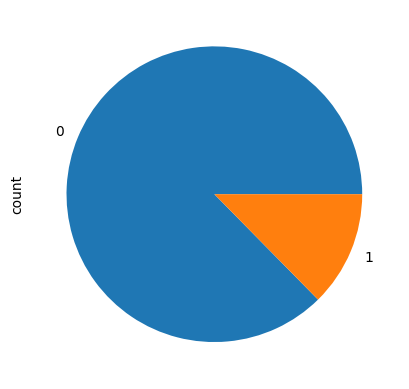

In [31]:
df['target'].value_counts().plot(kind='pie')

[nltk_data] Downloading package punkt to /home/hari/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

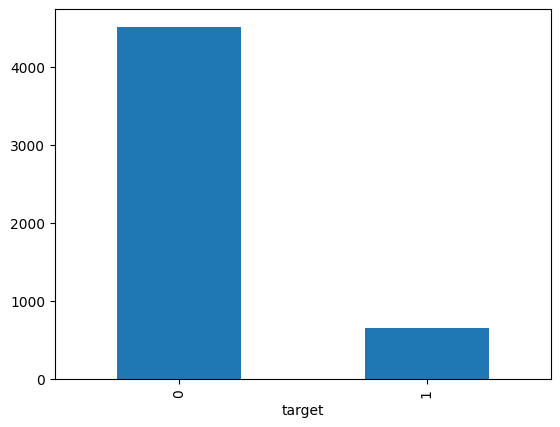

In [35]:
df['target'].value_counts().plot(kind='bar')
import nltk
nltk.download('punkt')

In [36]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))         

In [37]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    filtered_words = []
    
    for word in text:
        if word.isalnum():
            filtered_words.append(word)
    text = filtered_words[:]
    filtered_words.clear()
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            filtered_words.append(word)
    text = filtered_words[:]
    filtered_words.clear()
    stemmer = PorterStemmer()
    for word in text:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
    transformed_text = " ".join(filtered_words)
    return transformed_text

In [40]:
nltk.download('stopwords')

df['transformed_text'] = df['text'].apply(transform_text)

[nltk_data] Downloading package stopwords to /home/hari/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [44]:
X = cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
y = df['target'].values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score

In [50]:
svc = SVC(kernel='sigmoid', gamma=1.0) 

In [51]:
svc.fit(X_train, y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [53]:
y_pred = svc.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9323017408123792

In [59]:
precision = precision_score(y_test, y_pred)
precision

In [61]:
import pickle 

In [62]:
pickle.dump(svc,open("email_spam.pkl","wb"))